In [1]:
from scamp import *
import matplotlib
import random
import math

In [21]:
s = Session(tempo = 120)
# s.print_default_soundfont_presets()

In [22]:
clarinet = s.new_part("clarinet")
oboe = s.new_part("oboe")

Using preset Clarinet for clarinet
Using preset Oboe for oboe


In [23]:
clarinet.play_note(60,0.8,1.5) #(midinote,velocity,duration(s))

In [24]:
def try_it():
    clarinet.play_note(60,0.8,0.5)
    wait(0.5)
    oboe.play_note(64,0.8,0.5)
    wait(0.75)

In [25]:
for pitch in range(65,77):
    clarinet.play_note(pitch,0.8,0.25)

In [26]:
def melody(s,m,l):
    #current_clock().tempo = 100
    current_clock().apply_rate_function(lambda t: 1+0.5*math.cos(2*t**0.7), duration_units = 'time')
    pitch_list = [61,None,67,69,72] # None is rest
    dur_list = [m,s,s,m,l]
    oboe.play_note(70,0.8,4, blocking = False)
    for pitch,dur in zip(pitch_list,dur_list):
        clarinet.play_note(pitch,0.8,dur)

In [27]:
oboe.play_chord([67, 70, 74],[0.5,0.2,1],1)

In [28]:
oboe.play_note([67.5, 74, 70.3],[0.5,0.3,1],3)

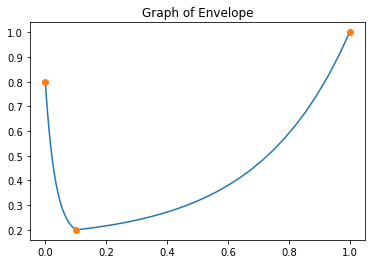

In [29]:
fp_cresc = Envelope.from_levels_and_durations([0.8,0.2,1],[0.1,0.9],[-3,3])
fp_cresc.show_plot()

In [30]:
oboe.play_chord([67, 70, 74],fp_cresc,1)

In [31]:
s = Session()

clk = fork(try_it,initial_tempo = 60)
clk.set_tempo_target(120,3,-2)
s.start_transcribing()
fork(melody,args = [0.5,1,1.5])
s.wait_for_children_to_finish()
performance = s.stop_transcribing()
performance.to_score(title = "First Species Counterpoint", composer = "My programme",time_signature = "4/4").show_xml()

ValueError: Can't record with empty ensemble; did you call "start_transcribing" before adding parts to the session?

In [32]:
s = Session()
s.tempo = 120 # beats per second
s.set_tempo_target(60,3,-2) # tempo = 120 -> 60, duration = 3 beats, curve_shape = sooner
#s.rate = 2 # beats per second
#s.beat_length = 0.5 
pitch_list = [61,64,67,69,72]
for i in range(10):
    oboe.play_note(random.choice(pitch_list),0.8,0.5)
    #s.tempo = random.uniform(60,200)

In [33]:
s = Session()
piano = s.new_part("piano")

Using preset Piano Merlin for piano


In [34]:
piano.play_chord([64, 67],1,1)